# Scatter plot graph generation with mean fluorescence values

### Libraries to use

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

In [2]:
import os
print(os.getcwd())

C:\Users\ADMIN


### Local data location

In [3]:
archivo_excel = r"C:\Users\ADMIN\Desktop\ROIs_refinadas\Mean_ROI_values.xlsx"

df = pd.read_excel(archivo_excel)

# Cargar hoja de Ned(-)
df_neg = pd.read_excel(archivo_excel, sheet_name="Ned(-)")
df_neg["Ned19"] = "Ned(-)"

# Cargar hoja de Ned(+)
df_pos = pd.read_excel(archivo_excel, sheet_name="Ned(+)")
df_pos["Ned19"] = "Ned(+)"

# Unir ambas tablas
df = pd.concat([df_neg, df_pos], ignore_index=True)

#print(df.columns)   # ahora sí deberías ver "Ned19"

### Generation and download of scatter plot

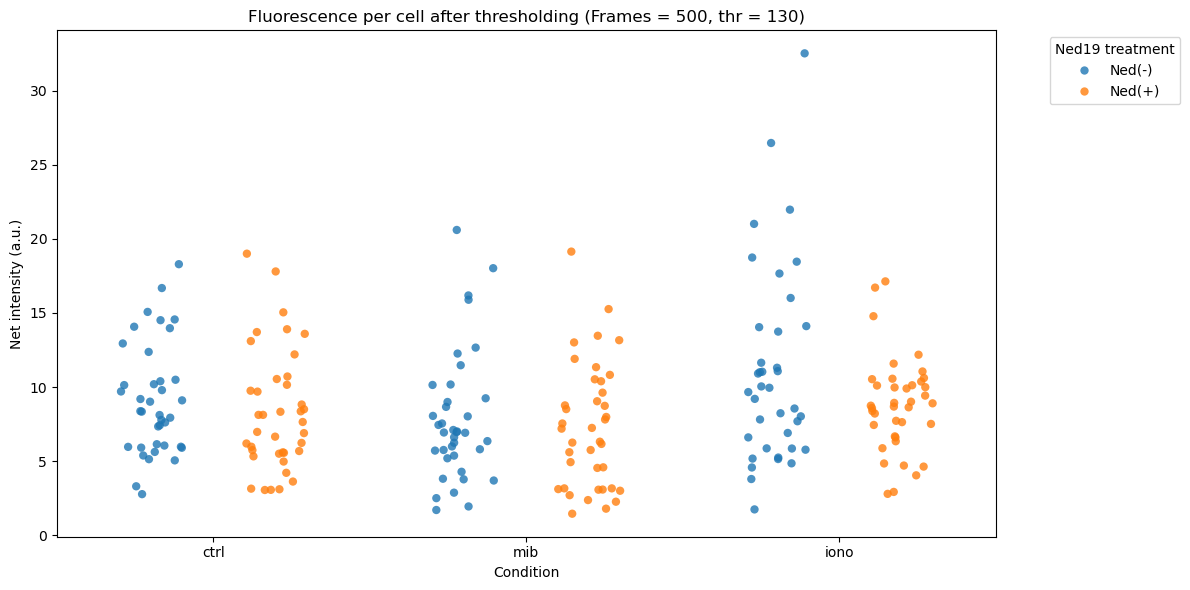

In [4]:
# 2. Graficar scatter por célula
# ==========================
plt.figure(figsize=(12,6))

sns.stripplot(
    data=df,
    x="Condición",      # 3 condiciones principales (ctrl, mib, iono)
    y="Mean_Net",       # Fluorescencia neta
    hue="Ned19",        # Subgrupos: Ned(-) y Ned(+)
    dodge=True,         # coloca Ned(-) y Ned(+) uno junto al otro
    jitter=0.2,         # ligero jitter para evitar solapamiento
    alpha=0.8,          # transparencia
    size=6              # tamaño de puntos
)

# ==========================
# 3. Estética
# ==========================
plt.title("Fluorescence per cell after thresholding (Frames = 500, thr = 130)")
plt.ylabel("Net intensity (a.u.)")
plt.xlabel("Condition")
plt.legend(title="Ned19 treatment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


# 4. Guardar y mostrar
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_fluorescencia_Ned1.png", dpi=300)
plt.show()

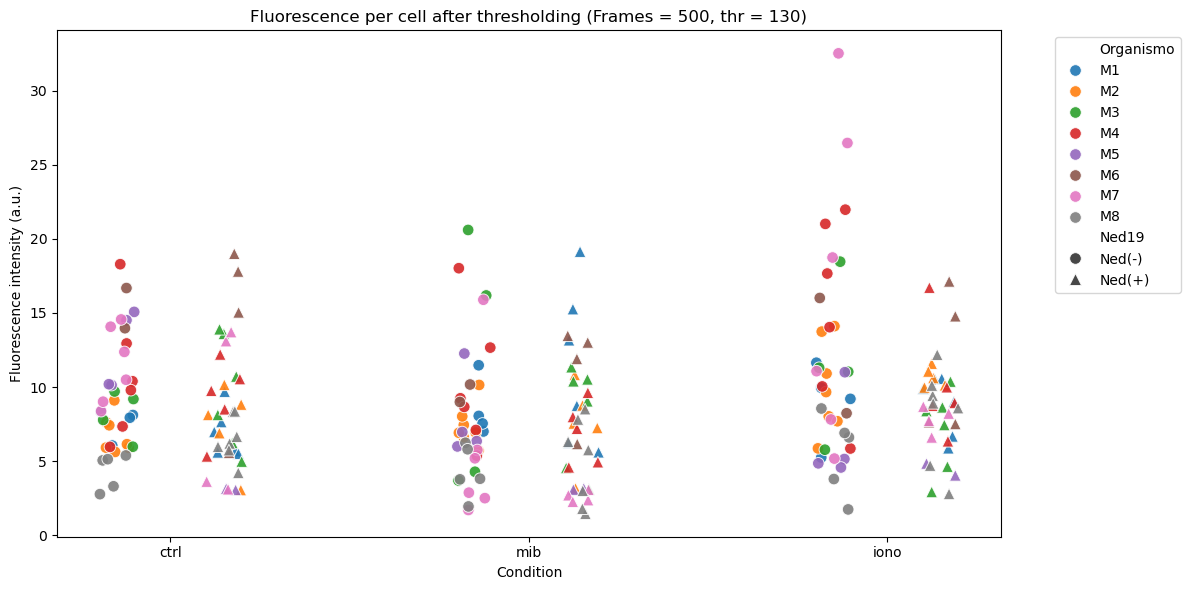

In [8]:
# Condition order
order = ["ctrl", "mib", "iono"]
df["Condición"] = pd.Categorical(df["Condición"], categories=order, ordered=True)

# Base numerical position
cond_map = {c: i for i, c in enumerate(order)}
df["x"] = df["Condición"].map(cond_map)

# Offset for each NED condition: Ned(-) / Ned(+)
offset_map = {"Ned(-)": -0.15, "Ned(+)": 0.15}
df["x_shift"] = df["x"].astype(float) + df["Ned19"].map(offset_map).astype(float)

# Small random jitter
np.random.seed(42)  # Fix random seed for reproducibility
df["x_jitter"] = df["x_shift"] + np.random.uniform(-0.05, 0.05, size=len(df)) # Add small random variation to avoid overlapping points

# Fixed palette by Organism
orgs = sorted(df["Organismo"].unique())   # Get sorted list of unique organisms
palette = dict(zip(orgs, sns.color_palette("tab10", n_colors=len(orgs))))   # Assign each organism a distinct color from tab10 palette

# Plot
plt.figure(figsize=(12,6))      # Create figure with defined size
sns.scatterplot(                
    data=df,
    x="x_jitter",               # Use jittered X values to spread points horizontally
    y="Mean_Net",               # Plot fluorescence intensity on Y axis
    hue="Organismo",            # Color points by organism (M1, M2, …)
    palette=palette,            # Apply fixed color mapping
    style="Ned19",               # Marker shape by Ned(-) or Ned(+)
    markers={"Ned(-)": "o", "Ned(+)": "^"},    # Define circle for Ned(-) and triangle for Ned(+)
    s=70,                       # Marker size
    alpha=0.9,                  # Marker transparency
    legend="full"               # Show full legend (all hues and styles)
)

# Plot style and details
plt.xticks(range(len(order)), order)
plt.title("Fluorescence per cell after thresholding (Frames = 500, thr = 130)")
plt.ylabel("Fluorescence intensity (a.u.)")
plt.xlabel("Condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=None)
plt.tight_layout()
#plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_fluorescencia_Ned2.png", dpi=300)
plt.show()

In [9]:
df["x"]

0      0
1      0
2      1
3      1
4      2
      ..
232    1
233    1
234    2
235    2
236    2
Name: x, Length: 237, dtype: category
Categories (3, int64): [0 < 1 < 2]

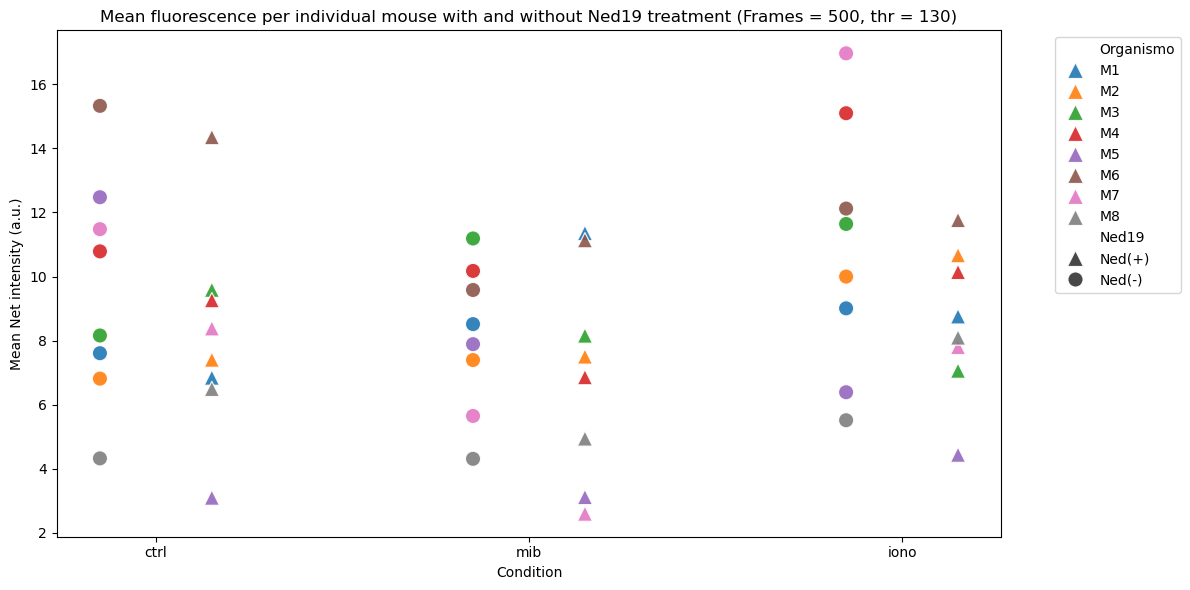

In [6]:
# --- Fluorescence mean by organisms, condition and with and without Ned19 treatment
df_mean = df.groupby(
    ["Organismo","Condición","Ned19"], 
    as_index=False, 
    observed=True
)["Mean_Net"].mean()

# Condition order
order = ["ctrl", "mib", "iono"]
df_mean["Condición"] = pd.Categorical(df_mean["Condición"], categories=order, ordered=True)

# Mapping conditions with numerical positions
cond_map = {c: i for i, c in enumerate(order)}
df_mean["x"] = df_mean["Condición"].map(cond_map)

# Little Ned(-) and Ned(+) displacements while plotting (to separate them)
offset_map = {"Ned(-)": -0.15, "Ned(+)": 0.15}
df_mean["x_shift"] = df_mean["x"].astype(float) + df_mean["Ned19"].map(offset_map).astype(float)

# Fixed palette by Organism
orgs = sorted(df_mean["Organismo"].unique())
palette = dict(zip(orgs, sns.color_palette("tab10", n_colors=len(orgs))))

# Plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_mean,
    x="x_shift",
    y="Mean_Net",
    hue="Organismo",                  
    palette=palette,
    style="Ned19",                    
    markers={"Ned(-)": "o", "Ned(+)": "^"},
    s=120,
    alpha=0.9
)

# Plot style and details
plt.xticks(range(len(order)), order)
plt.title("Mean fluorescence per individual mouse with and without Ned19 treatment (Frames = 500, thr = 130)")
plt.ylabel("Mean Net intensity (a.u.)")
plt.xlabel("Condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=None)
plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_fluorescencia_Ned3.png", dpi=300)
plt.show()

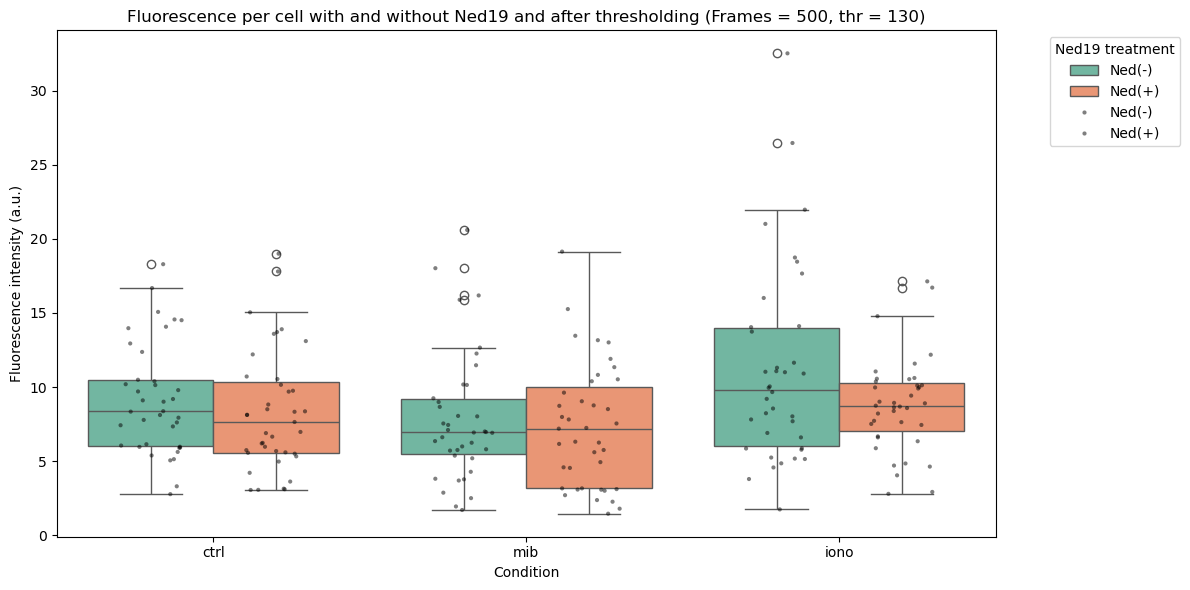

In [7]:
plt.figure(figsize=(12,6))               # Create a new figure with size 12x6 inches

sns.boxplot(
    data=df,
    x="Condición",
    y="Mean_Net",
    hue="Ned19",                        # Subdivide each condition into Ned(-) and Ned(+)
    palette="Set2"                      # Use Set2 color palette for the two groups (another Set can be used)
)

sns.stripplot(
    data=df,
    x="Condición",
    y="Mean_Net",
    hue="Ned19",                        # Same subdivision: Ned(-) vs Ned(+)
    dodge=True,                         # Place Ned(-)/Ned(+) side by side within each condition
    jitter=0.2,                         # Add horizontal noise so points don’t overlap exactly
    alpha=0.5,                          # Point transparency
    palette=["black"]*2,                # Force all points to be black regardless of Ned19
    size=3
)

plt.title("Fluorescence per cell with and without Ned19 and after thresholding (Frames = 500, thr = 130)")
plt.ylabel("Fluorescence intensity (a.u.)")
plt.xlabel("Condition")
plt.legend(title="Ned19 treatment", bbox_to_anchor=(1.05, 1), loc="upper left")    # Place legend outside the plot, to the right
plt.tight_layout()                                                                 # Adjust spacing to prevent overlap
plt.savefig(r"C:\Users\ADMIN\Desktop\ROIs_refinadas\scatter_fluorescencia_Ned4.png", dpi=300)
plt.show()